In [55]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import minimize
from sklearn.neighbors import NearestNeighbors
from multiprocessing import Pool

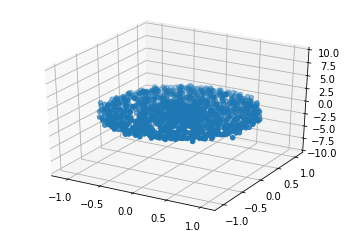

In [2]:
data = pd.read_csv("sphere_gaussian.csv")
x = data.values[:,0] # Read 
x = np.array([x])
x = np.transpose(x)
y = data.values[:,1]
y = np.array([y])
y = np.transpose(y)
z = data.values[:,2]
z = np.array([z])
z = np.transpose(z)
data_array = np.append(x,y,1)
data_array = np.append(data_array,z,1)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_array[:,0],data_array[:,1],data_array[:,2])
ax.set_zlim3d(-10,10)
plt.show()
length = len(data_array)

In [3]:
### KNN function ###
def findknn(X,K,i):
    nbrs = NearestNeighbors(n_neighbors=K, algorithm='ball_tree').fit(X)
    # indices.shape = (M,K)
    distances, indices = nbrs.kneighbors(X)
    Xi_knn = X[indices[i,:],:]
    return Xi_knn

In [13]:
alpha = 0.05
beta = 0.1
lamda = 0.1
phi = 1.57
theta = 0.5

new_data = np.empty(data_array.shape)
for i in range(length):
    p = data_array[i,:].reshape(3,)
    pnew_x = p[0]
    pnew_y = p[1]
    pnew_z = p[2]
    p_tilda =[p[0],p[1],p[2],i]
    x0 = [pnew_x,pnew_y,pnew_z,phi,theta]
    
pnew_x = x[0]
pnew_y = x[1]
pnew_z = x[2]
phi = x[3]
theta = x[4]
px = p_tilda[0]
py = p_tilda[1]
pz = p_tilda[2]
i = p_tilda[3]
knn = 30
p = np.array([px, py, pz])
pnew = np.array([pnew_x,pnew_y,pnew_z])

nx = (math.cos(phi))*(math.cos(theta))
ny = (math.cos(phi))*(math.sin(theta))
nz = math.sin(phi)
n = np.array([nx,ny,nz])
A = 0.5*np.exp(alpha*((LA.norm(p-pnew))**2)).item()
print(p)
print(pnew)
Xi_knn = findknn(data_array,knn,i) # use knn to find the nearest k neighbours

[ 1.02934318 -0.28955361 -0.13986384]
[[0.90780057]
 [0.95741483]
 [0.81268245]]


In [50]:
def objective1(x,p_tilda):
    pnew_x = x[0]
    pnew_y = x[1]
    pnew_z = x[2]
    phi = x[3]
    theta = x[4]
    px = p_tilda[0]
    py = p_tilda[1]
    pz = p_tilda[2]
    i = p_tilda[3]
    knn = 10
    p = np.array([px, py, pz])
    pnew = np.array([pnew_x,pnew_y,pnew_z])
    
    nx = (math.cos(phi))*(math.cos(theta))
    ny = (math.cos(phi))*(math.sin(theta))
    nz = math.sin(phi)
    n = np.array([nx,ny,nz])
    
    A = 0.5*np.exp(alpha*((LA.norm(p-pnew))**2)).item()
    Xi_knn = findknn(data_array,knn,i) # use knn to find the nearest k neighbours
    B = np.exp(-beta*LA.norm(Xi_knn-p, axis = 1)**2)
    D = np.exp(-lamda*(np.dot(Xi_knn-pnew.reshape(1,3),n)**2))
    F = (((Xi_knn-pnew.reshape(1,3)).dot(n))**2)

    summation = np.multiply(B,D)
    summation = np.multiply(summation,F)
    summation = np.sum(summation)
    cost = A*summation
    return cost

In [51]:
bnd1 = (-math.inf,math.inf)
bnd2 = (-math.inf,math.inf)
bnd3 = (-math.inf,math.inf)
bnd4 = (0,math.pi*2)
bnd5 = (0,math.pi*2)
bnd = (bnd1,bnd2,bnd3,bnd4,bnd5)

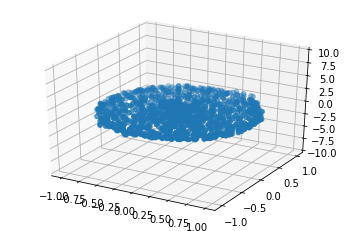

In [52]:
alpha = 0.05
beta = 0.1
lamda = 0.1
phi = 1.57
theta = 0.5

new_data = np.empty(data_array.shape)
for i in range(length):
    #print(i)
    p = data_array[i,:].reshape(3,)
    pnew_x = p[0]
    pnew_y = p[1]
    pnew_z = p[2]
    p_tilda =[p[0],p[1],p[2],i]
    x0 = [pnew_x,pnew_y,pnew_z,phi,theta]
    
    cost1 = objective1(x0,p_tilda)

    sol = minimize(objective1,x0, method = 'SLSQP',bounds = bnd,args = p_tilda)
    
    if type(sol.x[4]) == float:
        phi = sol.x[3]
        theta = sol.x[4]
    else:
        phi = sol.x[3].item()

        theta = sol.x[4].item()
    new_data[i][0] = np.array([sol.x[0].item()])
    new_data[i][1] = np.array([sol.x[1].item()])
    new_data[i][2] = np.array([sol.x[2].item()])
    #print(sol.x)
    pass
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#ax.scatter(data_array[:,0],data_array[:,1],data_array[:,2])
ax.scatter(new_data[:,0],new_data[:,1],new_data[:,2])
ax.set_zlim3d(-10,10)
plt.show()

In [53]:
ax.scatter(new_data[:,0],new_data[:,1],new_data[:,2])
ax.set_zlim3d(-10,10)
plt.show()

In [43]:
if type(x) == int:
    print("int")

In [42]:
def objective(x,p_tilda):
    pnew_x = x[0]
    pnew_y = x[1]
    pnew_z = x[2]
    phi = x[3]
    theta = x[4]
    px = p_tilda[0]
    py = p_tilda[1]
    pz = p_tilda[2]
    i = p_tilda[3]
    knn = 30
    p = np.array([px, py, pz])
    pnew = np.array([pnew_x,pnew_y,pnew_z])
    
    nx = (math.cos(phi))*(math.cos(theta))
    ny = (math.cos(phi))*(math.sin(theta))
    nz = math.sin(phi)
    n = np.array([nx,ny,nz])
    A = 0.5*np.exp(alpha*((LA.norm(p-pnew))**2)).item()
    sum = 0
    Xi_knn = findknn(data_array,knn,i) # use knn to find the nearest k neighbours
    for j in range(knn):
        pk = Xi_knn[j,:].reshape(3,)
        B = np.exp(-beta*(LA.norm(pk-p))**2).item()

        D = np.exp(-lamda*(((pk-pnew).dot(n))**2)).item()
        #print(D)
        F = (((pk-pnew).dot(n))**2).item()
        #print('objective:\n',B,D,F)

        sum = sum + B*D*F
        pass
    cost = A*sum
    return cost
